In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv('beer_data.csv')

In [3]:
ratings.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [4]:
ratings.shape

(475984, 3)

In [5]:
#Grouping ratings by beer to get count

In [6]:
beergrouped_ratings = ratings.groupby(['beer_beerid']).count()

In [7]:
beergrouped_ratings = beergrouped_ratings.reset_index()

In [8]:
beergrouped_ratings[beergrouped_ratings['review_overall']>9].count()

beer_beerid           6953
review_profilename    6953
review_overall        6953
dtype: int64

In [9]:
min_ratings = beergrouped_ratings[beergrouped_ratings['review_overall']>10].beer_beerid

In [10]:
final_ratings = ratings[ratings['beer_beerid'].isin(min_ratings)]
final_ratings.shape

(397859, 3)

In [11]:
unique_users = final_ratings.review_profilename.unique().shape[0]

In [12]:
unique_users

21235

In [13]:
unique_users/final_ratings.shape[0]*100

5.337317994565914

In [14]:
unique_beers = final_ratings.beer_beerid.unique().shape[0]

In [15]:
unique_beers

6545

In [16]:
avg_beer_ratings = final_ratings.groupby('beer_beerid').mean()

In [17]:
avg_beer_ratings = avg_beer_ratings.reset_index()

In [18]:
final_ratings.review_overall.mean()

3.8440867241912335

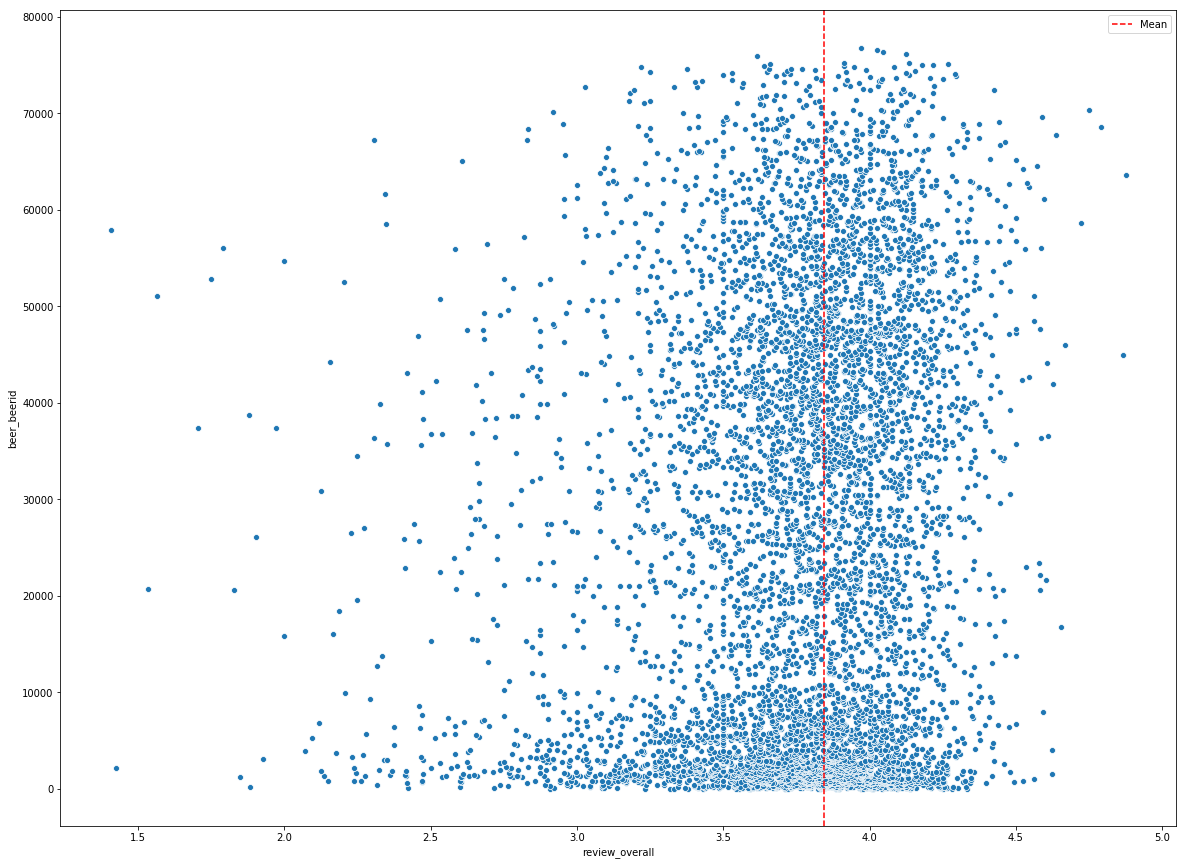

In [85]:
plt.figure(figsize=(20,15))
sns.scatterplot(y='beer_beerid',x='review_overall',data=avg_beer_ratings)
plt.axvline(np.mean(final_ratings.review_overall),color='r', linestyle='--')
plt.legend({'Mean':np.mean(final_ratings.review_overall)})
plt.show()

In [19]:
beergrouped_ratings.review_overall.mean()

11.808673216234991

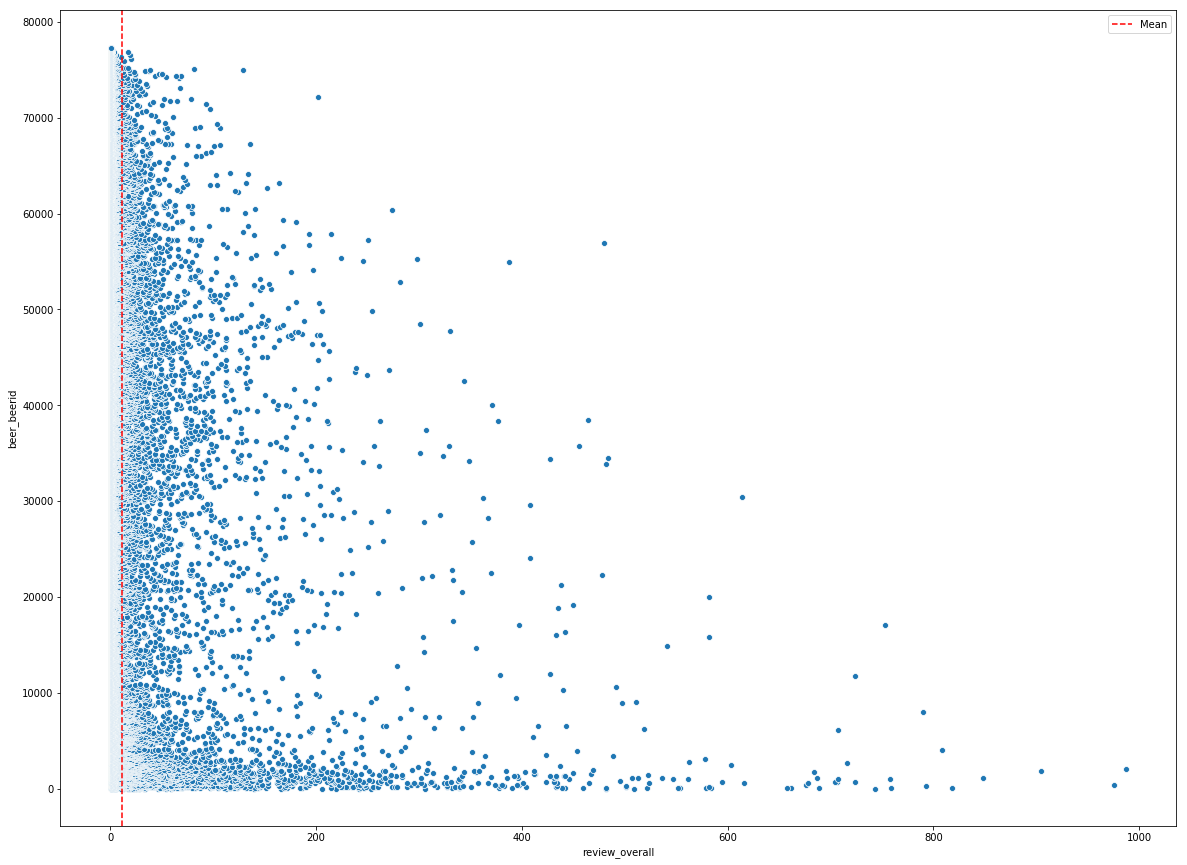

In [20]:
plt.figure(figsize=(20,15))
sns.scatterplot(y='beer_beerid',x='review_overall',data=beergrouped_ratings)
plt.axvline(np.mean(beergrouped_ratings.review_overall),color='r', linestyle='--')
plt.legend({'Mean':np.mean(beergrouped_ratings.review_overall)})
plt.show()

In [21]:
usergrouped_ratings = final_ratings.groupby('review_profilename').count()

In [22]:
usergrouped_ratings = usergrouped_ratings.reset_index()

In [23]:
usergrouped_ratings.head()

,review_profilename,beer_beerid,review_overall
0,0110x011,33,33
1,01Ryan10,1,1
2,04101Brewer,1,1
3,05Harley,36,36
4,0beerguy0,3,3


In [24]:
usergrouped_ratings.review_overall.mean()

18.733257982480925

In [25]:
avg_beer_ratings.head()

,beer_beerid,review_overall
0,5,3.553097
1,6,3.711462
2,7,3.317961
3,8,3.543478
4,9,3.378788


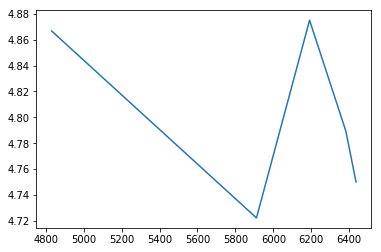

In [26]:
avg_beer_ratings[avg_beer_ratings.review_overall > 4.7]['review_overall'].plot()

In [27]:
avg_user_ratings = final_ratings.groupby('review_profilename').mean()

In [28]:
avg_user_ratings = avg_user_ratings.reset_index()

In [29]:
avg_user_ratings.drop('beer_beerid',inplace=True,axis=1)

In [30]:
avg_user_ratings.head()

,review_profilename,review_overall
0,0110x011,4.303030
1,01Ryan10,5.000000
2,04101Brewer,4.000000
3,05Harley,4.152778
4,0beerguy0,4.166667


In [31]:
average_ratings = final_ratings.groupby(['beer_beerid','review_profilename']).mean()

In [32]:
average_ratings = average_ratings.reset_index()

In [33]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(average_ratings,test_size=0.30, random_state = 45)

In [34]:
train.shape

(277556, 3)

In [35]:
test.shape

(118953, 3)

In [36]:
df_beer_ratings = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [37]:
df_beer_ratings.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
dummy_train = train.copy()
dummy_test = test.copy()

In [39]:
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x:0 if x>=1 else 1)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x:1 if x>=1 else 0)

In [40]:
dummy_train = dummy_train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(1)

In [41]:
dummy_test = dummy_test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [42]:
dummy_train.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01Ryan10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
04101Brewer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0tt0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [43]:
dummy_test.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
beer_ratings = train.pivot(
     index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [45]:
beer_ratings.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0tt0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
mean = np.nanmean(beer_ratings, axis=1)
df_subtracted = (beer_ratings.T-mean).T

In [47]:
df_subtracted.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0tt0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [49]:
user_predicted_ratings = np.dot(user_correlation, beer_ratings.fillna(0))
user_predicted_ratings

array([[ 0.2004701 ,  1.40749471,  0.81319861, ..., -0.19575764,
         0.62224315, -0.12495472],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.31740616,  4.04322997,  2.82366552, ...,  0.        ,
         0.27165803,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [50]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.200470,1.407495,0.813199,0.195055,0.117338,1.488191,0.079965,0.433298,0.121896,-0.510828,...,0.321626,1.306334,0.731854,0.265009,0.168587,0.190361,0.518127,-0.195758,0.622243,-0.124955
01Ryan10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04101Brewer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,-0.026106,0.899972,0.241281,0.064337,0.044925,0.148352,-0.178048,0.066078,-0.133226,-0.320455,...,0.351202,0.684798,0.096862,0.278112,0.036815,0.276840,0.328378,-0.130360,0.454067,0.156640
0tt0,1.626687,1.694427,1.769264,0.305835,0.269922,1.513632,0.036116,0.195640,0.096200,-0.001818,...,0.328831,1.358478,0.122577,0.033554,-0.034085,0.749043,0.299115,-0.124715,0.105017,0.189581


In [51]:
user_final_rating.loc['cokes'].sort_values(ascending=False)[0:5]

beer_beerid
276     26.840860
412     23.859642
1093    23.470936
1013    23.034587
645     21.399485
Name: cokes, dtype: float64

In [52]:
user_final_rating.loc['genog'].sort_values(ascending=False)[0:5]

beer_beerid
2093     19.368571
11757    19.085116
2671     18.734379
1093     18.472500
6108     17.445342
Name: genog, dtype: float64

In [53]:
test_beer_ratings = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)
mean = np.nanmean(test_beer_ratings, axis=1)
test_df_subtracted = (test_beer_ratings.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[ 1.         -0.09093258  0.         ...  0.          0.
   0.        ]
 [-0.09093258  1.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          1.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


In [54]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_ratings.fillna(0))
test_user_predicted_ratings

array([[0.08958911, 0.20739034, 0.55011885, ..., 0.        , 0.        ,
        0.        ],
       [0.98472697, 2.70874021, 1.77744954, ..., 0.        , 0.54440927,
        0.55446113],
       [0.47227366, 0.43706757, 0.        , ..., 0.        , 0.        ,
        0.06959302],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [55]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [56]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [57]:
test_ = test.pivot(
   index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [58]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [59]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

1.8482080977439987


In [60]:
#Item based recommendation

In [61]:
dummy_train = train.copy()
dummy_test = test.copy()

In [62]:
dummy_train['review_overall']=dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['review_overall']= dummy_test['review_overall'].apply(lambda x:1 if x>=1 else 1)

In [63]:
dummy_train.head()

,beer_beerid,review_profilename,review_overall
153571,2904,GClarkage,0
28027,245,Daniellobo,0
152731,2870,blitheringidiot,0
273897,29395,baos,0
275801,30282,bunnyhustle,0


In [64]:
dummy_train = dummy_train.pivot(
            index='review_profilename',
            columns='beer_beerid',
            values='review_overall').fillna(1)

In [65]:
dummy_test = dummy_test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall').fillna(0)

In [66]:
beer_ratings = train.pivot(
index='review_profilename',
columns='beer_beerid',
values='review_overall').T

In [67]:
beer_ratings.head()

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0tt0,1000Bottles,1001111,100floods,1050Sudz,108Dragons,...,zuffenhausen,zuggy9,zulufactor,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
mean = np.nanmean(beer_ratings,axis=1)

In [69]:
df_subtracted = (beer_ratings.T-mean).T

In [70]:
df_subtracted.head()

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0tt0,1000Bottles,1001111,100floods,1050Sudz,108Dragons,...,zuffenhausen,zuggy9,zulufactor,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.00000000e+00 -1.63600586e-02  8.25041553e-02 ...  0.00000000e+00
   0.00000000e+00 -2.06066100e-03]
 [-1.63600586e-02  1.00000000e+00  6.63643807e-02 ...  0.00000000e+00
   0.00000000e+00 -2.73537156e-02]
 [ 8.25041553e-02  6.63643807e-02  1.00000000e+00 ...  2.10269489e-03
   1.01714809e-02 -1.66014504e-04]
 ...
 [ 0.00000000e+00  0.00000000e+00  2.10269489e-03 ...  1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.01714809e-02 ...  0.00000000e+00
   1.00000000e+00  2.57132682e-01]
 [-2.06066100e-03 -2.73537156e-02 -1.66014504e-04 ...  0.00000000e+00
   2.57132682e-01  1.00000000e+00]]


In [72]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.        , 0.08250416, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.06636438, ..., 0.        , 0.        ,
        0.        ],
       [0.08250416, 0.06636438, 1.        , ..., 0.00210269, 0.01017148,
        0.        ],
       ...,
       [0.        , 0.        , 0.00210269, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01017148, ..., 0.        , 1.        ,
        0.25713268],
       [0.        , 0.        , 0.        , ..., 0.        , 0.25713268,
        1.        ]])

In [73]:
item_predicted_ratings = np.dot((beer_ratings.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.22219243, 0.88079315, 0.69593639, ..., 0.18332   , 0.45289524,
        0.21002296],
       [0.        , 0.        , 0.15647744, ..., 0.        , 0.        ,
        0.25253165],
       [0.        , 0.11448041, 0.13126253, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04594692, 0.01579273, 0.00606325, ..., 0.        , 0.        ,
        0.        ],
       [0.07825511, 0.04467391, 0.05969706, ..., 0.        , 0.        ,
        0.        ],
       [0.00924013, 0.01616328, 0.00133903, ..., 0.        , 0.        ,
        0.        ]])

In [74]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.222192,0.880793,0.695936,0.244119,0.175966,0.887092,0.392365,0.608433,0.045400,0.382496,...,2.881466,0.665979,0.353793,1.115486,0.118708,0.118984,0.939840,0.183320,0.452895,0.210023
01Ryan10,0.000000,0.000000,0.156477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.015136,0.160130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.252532
04101Brewer,0.000000,0.114480,0.131263,0.121237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.069164,0.032309,0.105212,0.042347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,0.203310,0.499220,0.563102,0.482507,0.000000,0.514938,0.014772,0.000000,0.036928,0.786667,...,1.532930,0.471043,0.100842,0.659170,0.090462,0.471073,0.876971,0.196091,0.153685,0.075907
0tt0,0.246393,0.369690,0.060461,0.000000,0.128759,0.234348,0.081377,0.246227,0.172690,0.095762,...,0.061076,0.124375,0.440073,0.167939,0.097560,0.068588,0.006372,0.008268,0.000000,0.076107


In [75]:
item_final_rating.loc['05Harley'].sort_values(ascending=False)[0:5]

beer_beerid
62473    3.592502
35225    3.227861
40502    3.065310
46209    2.904414
6512     2.867169
Name: 05Harley, dtype: float64

In [76]:
test_beer_ratings = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

mean = np.nanmean(test_beer_ratings, axis=1)
test_df_subtracted = (test_beer_ratings.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [77]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_ratings.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [79]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))



# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


In [80]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.233467366819437


In [81]:
user_final_rating.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.200470,1.407495,0.813199,0.195055,0.117338,1.488191,0.079965,0.433298,0.121896,-0.510828,...,0.321626,1.306334,0.731854,0.265009,0.168587,0.190361,0.518127,-0.195758,0.622243,-0.124955
01Ryan10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04101Brewer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,-0.026106,0.899972,0.241281,0.064337,0.044925,0.148352,-0.178048,0.066078,-0.133226,-0.320455,...,0.351202,0.684798,0.096862,0.278112,0.036815,0.276840,0.328378,-0.130360,0.454067,0.156640
0tt0,1.626687,1.694427,1.769264,0.305835,0.269922,1.513632,0.036116,0.195640,0.096200,-0.001818,...,0.328831,1.358478,0.122577,0.033554,-0.034085,0.749043,0.299115,-0.124715,0.105017,0.189581


In [82]:
item_final_rating.loc['cokes'].sort_values(ascending=False)[0:5]

beer_beerid
26980    19.806327
6590     19.561288
7879     18.360888
38426    18.033479
3149     17.836406
Name: cokes, dtype: float64

In [83]:
item_final_rating.loc['genog'].sort_values(ascending=False)[0:5]

beer_beerid
7524     5.409105
15958    5.121766
6590     4.927235
37841    4.658472
39043    4.573114
Name: genog, dtype: float64

In [84]:
item_final_rating.loc['giblet'].sort_values(ascending=False)[0:5]

beer_beerid
36656    5.068481
41524    4.944030
999      4.937885
7524     4.785638
54851    4.670602
Name: giblet, dtype: float64